### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8098,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,50plus,Married partner,...,never,4~8,1~3,less1,1,1,1,0,1,0
1074,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,31,Unmarried partner,...,1~3,gt8,4~8,1~3,1,1,0,0,1,1
1561,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Single,...,less1,1~3,1~3,1~3,1,1,1,0,1,0
7404,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,0,1,1
600,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,26,Single,...,never,4~8,1~3,less1,1,1,0,0,1,1
12273,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,gt8,4~8,4~8,4~8,1,1,0,0,1,0
9979,Home,Partner,Sunny,30,10PM,Restaurant(<20),1d,Female,21,Married partner,...,never,4~8,1~3,less1,1,0,0,1,0,1
8709,Home,Partner,Sunny,80,6PM,Coffee House,1d,Male,31,Married partner,...,4~8,less1,4~8,less1,1,0,0,1,0,1
2446,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,gt8,gt8,1~3,less1,1,1,1,0,1,1
32,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
# Create a boolean mask of NaN and blank values
nan_mask = data.isna() | data.eq('')

# Use the 'any' method to show which columns have at least one NaN or blank value
cols_with_nan_or_blank = data.columns[nan_mask.any()].tolist()

print("The following columns have at least one NaN or blank value:", cols_with_nan_or_blank)

The following columns have at least one NaN or blank value: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


C:\Users\Ruben D. Colmenares\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Check the data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
destination             12684 non-null object
passanger               12684 non-null object
weather                 12684 non-null object
temperature             12684 non-null int64
time                    12684 non-null object
coupon                  12684 non-null object
expiration              12684 non-null object
gender                  12684 non-null object
age                     12684 non-null object
maritalStatus           12684 non-null object
has_children            12684 non-null int64
education               12684 non-null object
occupation              12684 non-null object
income                  12684 non-null object
car                     108 non-null object
Bar                     12577 non-null object
CoffeeHouse             12467 non-null object
CarryAway               12533 non-null object
RestaurantLessThan20    12554 non-null object
Restaurant20To50     

In [8]:
# Check the number of missing values per column
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [9]:
# I see the 'Car' column has only 108 non null values. So I decided to drop this column since it is not relevant.
data.drop('car', axis=1, inplace=True)
print(data.isnull().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 


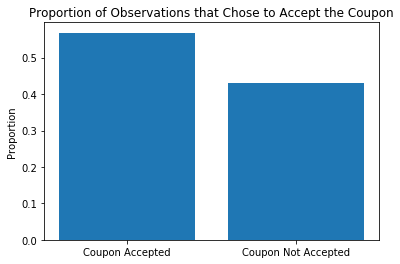

In [10]:
# Calculate the proportion of observations that chose to accept the coupon
prop_accepted = data['Y'].mean()

# Create a bar chart
plt.bar(['Coupon Accepted', 'Coupon Not Accepted'], [prop_accepted, 1-prop_accepted], align='center')
plt.title('Proportion of Observations that Chose to Accept the Coupon')
plt.ylabel('Proportion')
plt.show()

We clearly can see that more than half of our population accept a Coupon. We'll deep dive into this data later on, but so far it's shown that almost 60% see value in receiving coupons.

5. Use a bar plot to visualize the `coupon` column.

In [11]:
data['coupon'].sample(10)

11882             Coffee House
9615     Carry out & Take away
7775              Coffee House
1544              Coffee House
6616         Restaurant(20-50)
11295    Carry out & Take away
11212          Restaurant(<20)
11978          Restaurant(<20)
855               Coffee House
2211     Carry out & Take away
Name: coupon, dtype: object

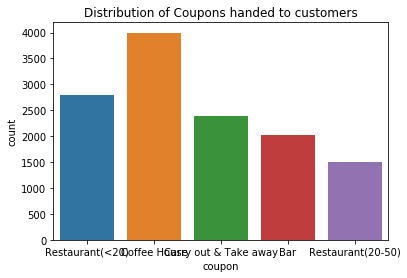

In [12]:
sns.countplot(x='coupon', data=data)
plt.title('Distribution of Coupons handed to customers')
plt.show()

6. Use a histogram to visualize the temperature column.

In [13]:
data['temperature'].sample(10)

1354     80
7502     80
10817    30
3931     55
11769    30
7310     55
8057     80
2259     55
6629     55
9369     80
Name: temperature, dtype: int64

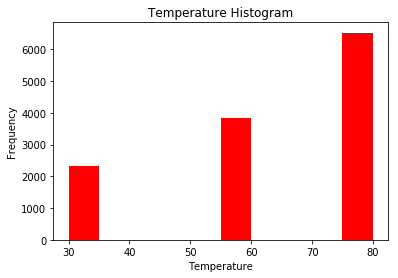

In [14]:
# Extract the temperature column
temperature = data['temperature']

# Create a histogram
plt.hist(temperature, color='red')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')

# Display the plot
plt.show()

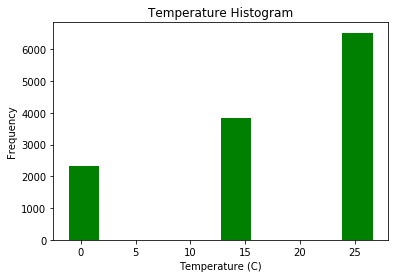

In [15]:
#I'll have a new column called "Temperature_C" in order to show temperatures in  Celsius
data['temperature_C'] = (data['temperature'] - 32) * 5/9

temperature_C = data['temperature_C']

# Create a histogram
plt.hist(temperature_C, color='green')

# Add labels and title
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')

# Display the plot
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
df_bar = data.query('coupon == "Bar"')
df_bar.info()
#df_bar.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
destination             2017 non-null object
passanger               2017 non-null object
weather                 2017 non-null object
temperature             2017 non-null int64
time                    2017 non-null object
coupon                  2017 non-null object
expiration              2017 non-null object
gender                  2017 non-null object
age                     2017 non-null object
maritalStatus           2017 non-null object
has_children            2017 non-null int64
education               2017 non-null object
occupation              2017 non-null object
income                  2017 non-null object
Bar                     1996 non-null object
CoffeeHouse             1978 non-null object
CarryAway               1993 non-null object
RestaurantLessThan20    1994 non-null object
Restaurant20To50        1981 non-null object
toCoupon_GEQ5min        2017 non-null i

2. What proportion of bar coupons were accepted?


In [17]:
bar_acceptance_rate = (df_bar["Y"] == 1).mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2f}")

Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

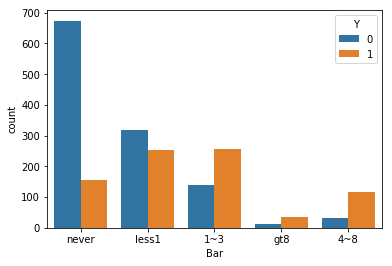

In [18]:
sns.countplot(x='Bar', data=df_bar, hue='Y')


This plot was to see how each frequency group was divided. Now I'll create a new column grouping frequencies below and above 3 times a month.

In [19]:
df_bar['Bar'].sample(10)

6599     never
3439       4~8
5061     never
5347     less1
9042       1~3
7211     never
4896     never
9349     never
11691    never
3181     never
Name: Bar, dtype: object

In [20]:
df_bar_less3 = df_bar

#Replace column
df_bar_less3['Bar'] = df_bar_less3['Bar'].replace({'4~8':'More than 3', 'gt8':'More than 3','1~3':'Less than or equal to 3',
                                                   'less1':'Less than or equal to 3'})

df_bar_less3['Bar'].sample(10)

C:\Users\Ruben D. Colmenares\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


465                  More than 3
2677     Less than or equal to 3
4239     Less than or equal to 3
10461                      never
6601                       never
4412     Less than or equal to 3
10909    Less than or equal to 3
4577                       never
12440                      never
9771                       never
Name: Bar, dtype: object

Bar
Less than or equal to 3    0.527404
More than 3                0.768844
never                      0.187952
Name: Y, dtype: float64


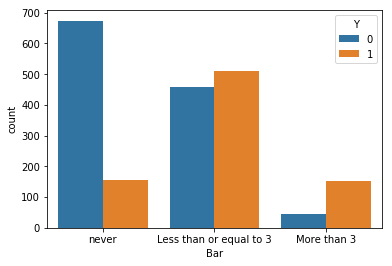

In [21]:
sns.countplot(x='Bar', data=df_bar_less3, hue='Y')

grouped = df_bar_less3.groupby('Bar')['Y'].mean()
print(grouped)

We can clearly see how those with more than 3 visits a month to a Bar, 70% of them accepted the coupon

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
# Filter the data based on the given criteria

#df_high_freq = df_bar[(df_bar['Bar'] > 1) & (df_bar['age'] > 25)]
df_high_freq = data.query('coupon == "Bar" & age > 25')


df_high_freq.head()

TypeError: '>' not supported between instances of 'str' and 'int'

I've just encountered an error(x) at the 'AGE' column. There are str values such as 50plus and so on... I'll filter them and decide them what to do with them:

(x)TypeError: '>' not supported between instances of 'str' and 'int'

In [23]:
df_strings = data.loc[data['age'].apply(lambda x: not str(x).isnumeric())]
df_strings['age'].unique()

array(['50plus', 'below21'], dtype=object)

Since the 50plus and below21 are not very specific...I'll replace them by setting a "generic" number for them to be converted to numeric afterwards.

In [24]:
data['age'] = pd.Series(data['age']).replace('50plus', 51).replace('below21', 20)
data['age'] = pd.to_numeric(data['age'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
destination             12684 non-null object
passanger               12684 non-null object
weather                 12684 non-null object
temperature             12684 non-null int64
time                    12684 non-null object
coupon                  12684 non-null object
expiration              12684 non-null object
gender                  12684 non-null object
age                     12684 non-null int64
maritalStatus           12684 non-null object
has_children            12684 non-null int64
education               12684 non-null object
occupation              12684 non-null object
income                  12684 non-null object
Bar                     12577 non-null object
CoffeeHouse             12467 non-null object
CarryAway               12533 non-null object
RestaurantLessThan20    12554 non-null object
Restaurant20To50        12495 non-null object
toCoupon_GEQ5min    

Finally I can check query my dataframe to be above 25

In [25]:
df_high_freq = data.query('coupon == "Bar" & age > 25')
df_high_freq.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,temperature_C
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,26.666667
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,0,12.777778
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,1,1,0,1,0,12.777778
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,less1,1,1,0,0,1,1,26.666667
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,less1,1,0,0,1,0,1,12.777778


Now let's plot

Bar
1~3      0.658451
4~8      0.792453
gt8      0.700000
less1    0.406667
never    0.155698
Name: Y, dtype: float64


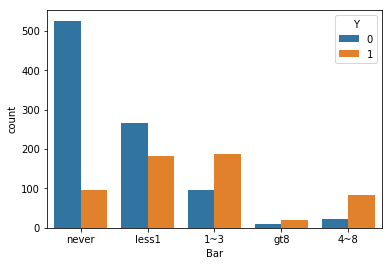

In [26]:
sns.countplot(x='Bar', data=df_high_freq, hue='Y')

grouped = df_high_freq.groupby('Bar')['Y'].mean()
print(grouped)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [27]:
df_bar_5 = data.query('coupon == "Bar" & passanger!= "Kid(s)" & occupation != "Farming Fishing & Forestry"')
df_bar_5['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance'], dtype=object)

Let's plot:

Bar
1~3      0.680556
4~8      0.790210
gt8      0.729167
less1    0.465619
never    0.198074
Name: Y, dtype: float64


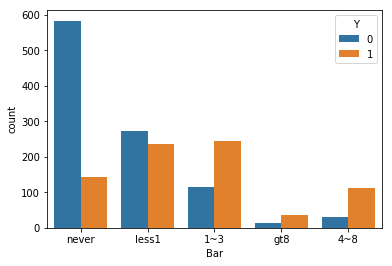

In [28]:
sns.countplot(x='Bar', data=df_bar_5, hue='Y')

grouped = df_bar_5.groupby('Bar')['Y'].mean()
print(grouped)

I was curious and saw to plot only those in farming and forestry:

Bar
less1    0.75
never    0.00
Name: Y, dtype: float64


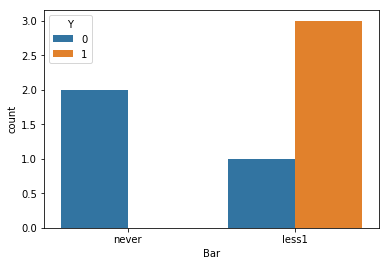

In [29]:
df_bar_FFF = data.query('coupon == "Bar" & passanger!= "Kid(s)" & occupation == "Farming Fishing & Forestry"')

sns.countplot(x='Bar', data=df_bar_FFF, hue='Y')

grouped = df_bar_FFF.groupby('Bar')['Y'].mean()
print(grouped)

No relevant info since it's so few... But wanted to see if the passangers with FFF had an impact on my previous plot

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [30]:
df7 = data.query('coupon == "Bar" & passanger!= "Kid(s)" & Bar != "less1" & Bar != "never"')
df8 = data.query('coupon == "Bar" & age < 30')
df9 = data.query('coupon == "Bar" & RestaurantLessThan20 != "less1" & RestaurantLessThan20 != "1~3"')
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 90 to 12544
Data columns (total 26 columns):
destination             569 non-null object
passanger               569 non-null object
weather                 569 non-null object
temperature             569 non-null int64
time                    569 non-null object
coupon                  569 non-null object
expiration              569 non-null object
gender                  569 non-null object
age                     569 non-null int64
maritalStatus           569 non-null object
has_children            569 non-null int64
education               569 non-null object
occupation              569 non-null object
income                  569 non-null object
Bar                     551 non-null object
CoffeeHouse             556 non-null object
CarryAway               553 non-null object
RestaurantLessThan20    561 non-null object
Restaurant20To50        551 non-null object
toCoupon_GEQ5min        569 non-null int64
toCoupon_GEQ15mi

I've created three DFs in order to plot them in one same plot, and compare their acceptance criteria.

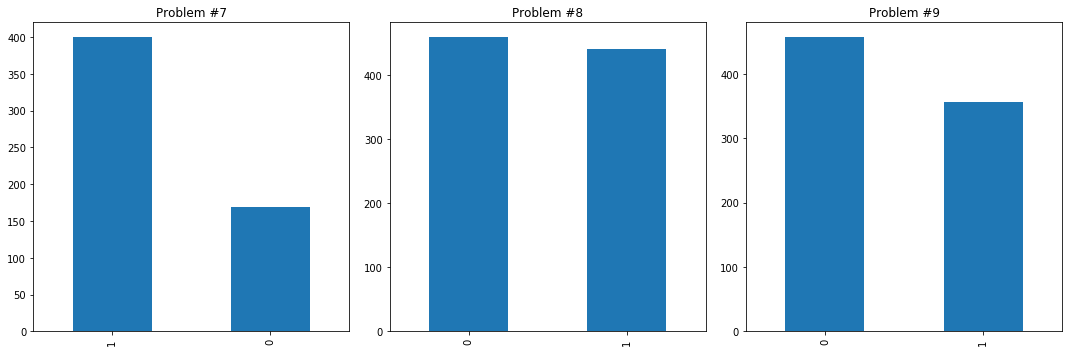

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

value_counts=df7['Y'].value_counts()

# First plot
df7['Y'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Problem #7')

# Second plot
df8['Y'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Problem #8')

# Third plot
df9['Y'].value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_title('Problem #9')

plt.tight_layout()
plt.rcParams.update({'figure.autolayout': True})
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

It is very evident that those who tend going to bars more that three times a month, are the ones accepting coupons the most.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

C:\Users\Ruben D. Colmenares\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


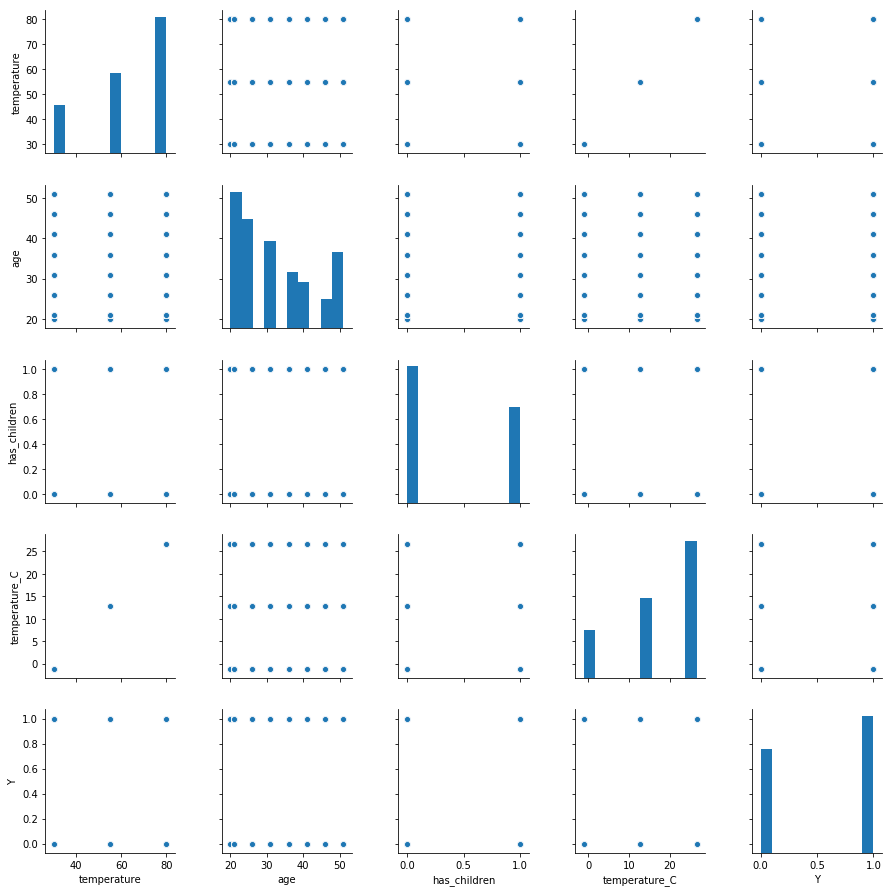

In [34]:
# Select columns of interest
columns = ['temperature', 'age', 'has_children', 'temperature_C', 'income','maritalStatus','passanger', 'Y']

# Create a pairplot
sns.pairplot(data[columns])

Im not seeing major or relevant info here in my pairplot. Will explore with other plots.

C:\Users\Ruben D. Colmenares\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


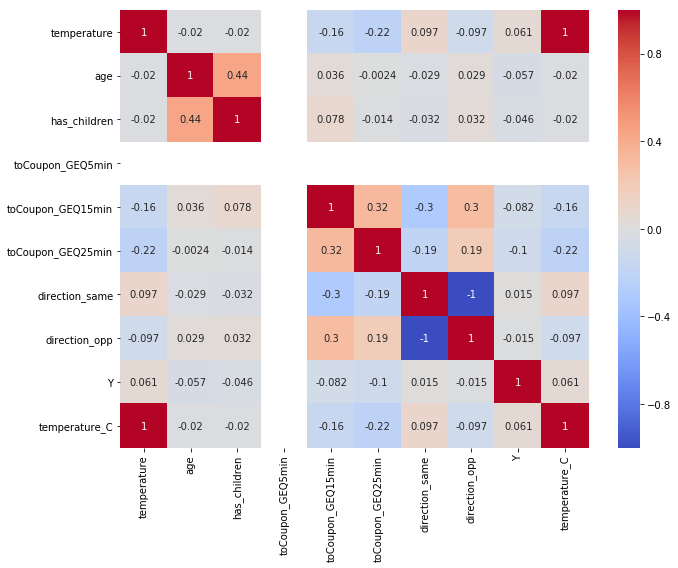

In [33]:
# Create correlation matrix
corr_matrix = data.corr()

# Set plot size
fig, ax = plt.subplots(figsize=(10,8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

I dont see major correlations aside the 'age' and 'has_children' values...

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
destination             12684 non-null object
passanger               12684 non-null object
weather                 12684 non-null object
temperature             12684 non-null int64
time                    12684 non-null object
coupon                  12684 non-null object
expiration              12684 non-null object
gender                  12684 non-null object
age                     12684 non-null int64
maritalStatus           12684 non-null object
has_children            12684 non-null int64
education               12684 non-null object
occupation              12684 non-null object
income                  12684 non-null object
Bar                     12577 non-null object
CoffeeHouse             12467 non-null object
CarryAway               12533 non-null object
RestaurantLessThan20    12554 non-null object
Restaurant20To50        12495 non-null object
toCoupon_GEQ5min    

C:\Users\Ruben D. Colmenares\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


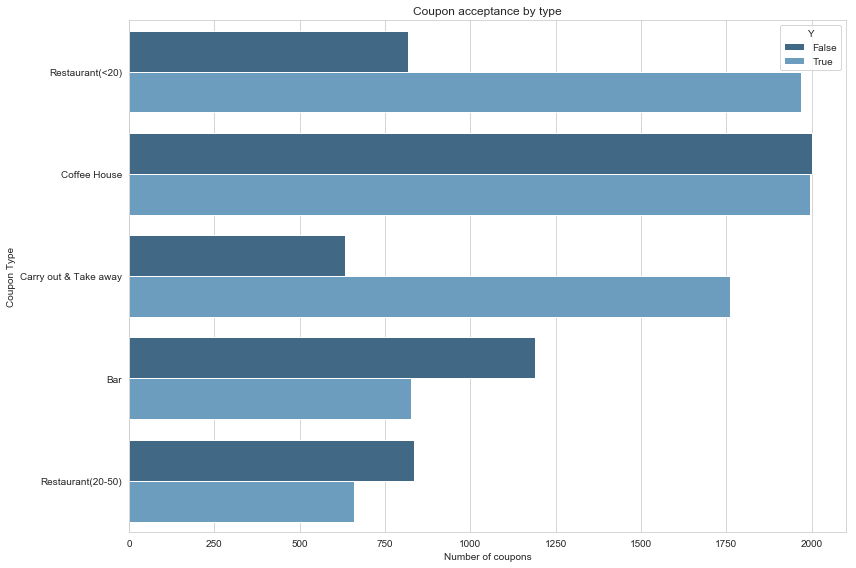

In [46]:
#Converting the 'Y' Column into Boolean
data['Y'] = data['Y'].astype(bool)

sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.countplot(y='coupon', hue='Y', data=data, palette='Blues_d')
plt.title("Coupon acceptance by type")
plt.xlabel("Number of coupons")
plt.ylabel("Coupon Type")
plt.show()

Interesting, Carry and Restaurants are the ones with more acceptance criteria. Let's explore them and see why.

In [50]:
data['temperature_C'].unique()

array([12.77777778, 26.66666667, -1.11111111])

C:\Users\Ruben D. Colmenares\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


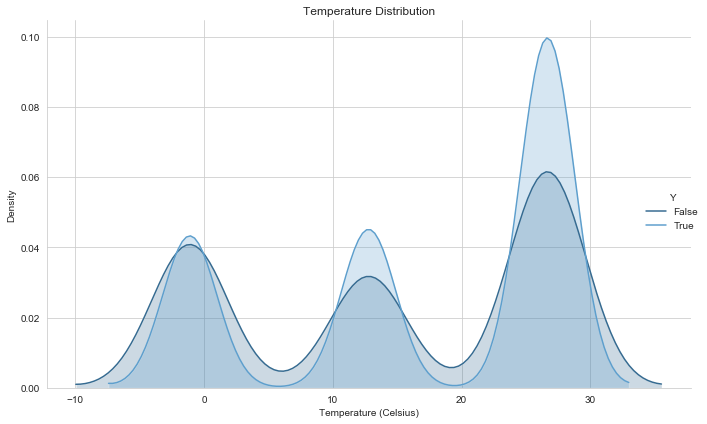

In [57]:
data_A = data.query('coupon == "Carry out & Take away" or coupon == "Restaurant(<20)"')

g = sns.FacetGrid(data_A, hue='Y', height=6, aspect=1.5, palette="Blues_d")
g.map(sns.kdeplot, "temperature_C", shade=True)
g.add_legend()
plt.title("Temperature Distribution")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Density")
plt.show()

I wanted to check on the impact of temperature in the decision making for accepting coupons for the two top categories. It seems that's the case. The higher the tempereature, the higher the acceptance.

However, it worth noting that for below zero temperatures, coupons' acceptance remains the same.